<div class="alert alert-warning">
    
<b>Disclaimer:</b> 
    
The main objective of the <i>Jupyter</i> notebooks is to show how to use the models of the <i>QENS library</i> by
    
- building a fitting model: composition of models, convolution with a resolution function  
- setting and running the fit  
- extracting and displaying information about the results  

These steps have a minimizer-dependent syntax. That's one of the reasons why different minimizers have been used in the notebooks provided as examples.  
But, the initial guessed parameters might not be optimal, resulting in a poor fit of the reference data.
    
</div>


# Equivalent sites circle with lmfit

## Introduction

<div class="alert alert-info">
    
The objective of this notebook is to show how to use the <b>Equivalent Sites Circle</b> model to perform some 
fits using <a href="https://lmfit.github.io/lmfit-py/">lmfit</a>.
</div>

### Physical units
Please note that the following units are used for the QENS models

| Type of parameter | Unit          |
| :---------------- | :-----------: |
| Time              | picosecond    |
| Length            | Angstrom      |
| Momentum transfer | 1/Angstrom    |

For information about unit conversion, please refer to the jupyter notebook called `Convert_units.ipynb` in the `tools` folder.

The dictionary of units defined in the cell below specify the units of the refined parameters adapted to the convention used in the experimental datafile.

In [1]:
# Units of parameters for selected QENS model and experimental data
dict_physical_units = {'omega': "1/ps", 
                       'q': "1/Angstrom", 
                       'scale': "unit_of_signal/ps", 
                       'center': "1/ps", 
                       'radius': "Angstrom", 
                       'resTime': "ps"}

## Importing the required librairies

In [2]:
from __future__ import print_function
import numpy as np

# for interactivity (plots, buttons...)
import ipywidgets

import matplotlib.pyplot as plt

from lmfit import Model, Parameters

import QENSmodels

## Plot of the fitting model

The widget below shows the peak shape function imported from QENSmodels where the function's parameters can be varied.

In [3]:
# Dictionary of initial values
ini_parameters = {'q': 1., 'scale': 5., 'center': 5., 'Nsites': 3, 'radius': 5., 'resTime': 1.} 

def interactive_fct(q, scale, center, Nsites, radius, resTime):
    xs = np.linspace(-10, 10, 100)
    
    fig1, ax1 = plt.subplots()
    ax1.plot(xs, QENSmodels.sqwEquivalentSitesCircle(xs, q, scale, center, Nsites, radius, resTime))
    ax1.set_xlabel('x')
    ax1.grid()

# Define sliders for modifiable parameters and their range of variations

q_slider = ipywidgets.FloatSlider(value=ini_parameters['q'],
                                  min=0.1, max=10., step=0.1,
                                  description='q', 
                                  continuous_update=False) 

scale_slider = ipywidgets.FloatSlider(value=ini_parameters['scale'],
                                      min=0.1, max=10, step=0.1,
                                      description='scale',
                                      continuous_update=False) 

center_slider = ipywidgets.IntSlider(value=ini_parameters['center'],
                                     min=-10, max=10, step=1,
                                     description='center', 
                                     continuous_update=False) 

Nsites_slider = ipywidgets.IntSlider(value=ini_parameters['Nsites'],
                                     min=2, max=10, step=1,
                                     description='Nsites',
                                     continuous_update=False)

radius_slider = ipywidgets.FloatSlider(value=ini_parameters['radius'],
                                       min=0.1, max=10, step=0.1,
                                       description='radius',
                                       continuous_update=False)

resTime_slider = ipywidgets.FloatSlider(value=ini_parameters['resTime'],
                                        min=0.1, max=10, step=0.1,
                                        description='resTime', 
                                        continuous_update=False)

grid_sliders = ipywidgets.HBox([ipywidgets.VBox([q_slider, scale_slider, center_slider])
                                ,ipywidgets.VBox([Nsites_slider, radius_slider, resTime_slider])])
                            

# Define function to reset all parameters' values to the initial ones
def reset_values(b):
    """Reset the interactive plots to inital values."""
    q_slider.value = ini_parameters['q'] 
    scale_slider.value = ini_parameters['scale'] 
    center_slider.value = ini_parameters['center']  
    Nsites_slider.value = ini_parameters['Nsites'] 
    radius_slider.value = ini_parameters['radius'] 
    resTime_slider.value = ini_parameters['resTime']

# Define reset button and occurring action when clicking on it
reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

# Display the interactive plot
interactive_plot = ipywidgets.interactive_output(interactive_fct,       
                                         {'q': q_slider, 
                                          'scale': scale_slider,
                                          'center': center_slider,
                                          'Nsites': Nsites_slider,
                                          'radius': radius_slider,
                                          'resTime': resTime_slider})  
                                            
display(grid_sliders, interactive_plot, reset_button)

Output()

Button(description='Reset', style=ButtonStyle())

## Creating the reference data

In [4]:
nb_points = 200
xx = np.linspace(-5, 5, nb_points)
added_noise = np.random.normal(0, 1, nb_points)

equiv_sites_circle_noisy = QENSmodels.sqwEquivalentSitesCircle(xx, 
                                                               q=1., 
                                                               scale=1.3, 
                                                               center=0.3, 
                                                               Nsites=5, 
                                                               radius=4., 
                                                               resTime=3.)*\
                           (1 + 0.1*added_noise) + 0.01*added_noise

## Setting and fitting

In [5]:
gmodel = Model(QENSmodels.sqwEquivalentSitesCircle)

print('Names of parameters:', gmodel.param_names)
print('Independent variable(s):', gmodel.independent_vars)

ini_values = {'scale': 1.22, 'center': 0.2, 'Nsites': 5, 'radius': 3.1, 'resTime': 0.33}

# Define boundaries for parameters to be refined
gmodel.set_param_hint('scale', min=0)
gmodel.set_param_hint('center', min=-5, max=5)
gmodel.set_param_hint('radius', min=0)
gmodel.set_param_hint('resTime', min=0)

# Fix some of the parameters
gmodel.set_param_hint('q', vary=False)
gmodel.set_param_hint('Nsites', vary=False)

# Fit
result = gmodel.fit(equiv_sites_circle_noisy, w=xx, q=1.,
                    scale=ini_values['scale'], 
                    center=ini_values['center'],
                    Nsites=ini_values['Nsites'],
                    radius=ini_values['radius'],
                    resTime=ini_values['resTime'])

Names of parameters: ['q', 'scale', 'center', 'Nsites', 'radius', 'resTime']
Independent variable(s): ['w']


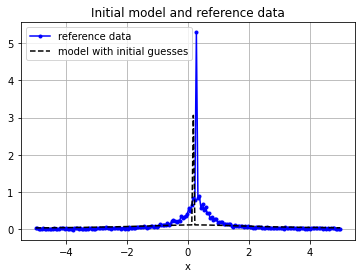

In [6]:
# Plots - Initial model and reference data
fig0, ax0 = plt.subplots()
ax0.plot(xx, equiv_sites_circle_noisy, 'b.-', label='reference data')
ax0.plot(xx, result.init_fit, 'k--', label='model with initial guesses')
ax0.set(xlabel='x', title='Initial model and reference data')
ax0.grid()
ax0.legend();

## Plotting results

using methods implemented in `lmfit`

Result of fit:
 [[Model]]
    Model(sqwEquivalentSitesCircle)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 200
    # variables        = 4
    chi-square         = 0.13898771
    reduced chi-square = 7.0912e-04
    Akaike info crit   = -1446.33742
    Bayesian info crit = -1433.14416
[[Variables]]
    q:        1 (fixed)
    scale:    1.25798371 +/- 0.01478848 (1.18%) (init = 1.22)
    center:   0.29929989 +/- 0.00510208 (1.70%) (init = 0.2)
    Nsites:   5 (fixed)
    radius:   2.28768559 +/- 0.01094950 (0.48%) (init = 3.1)
    resTime:  2.10487419 +/- 0.04298187 (2.04%) (init = 0.33)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale, radius)   = 0.860
    C(scale, resTime)  = -0.666
    C(radius, resTime) = -0.416


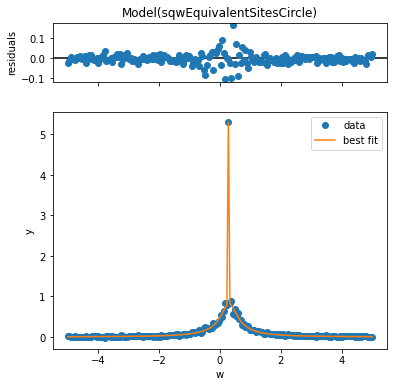

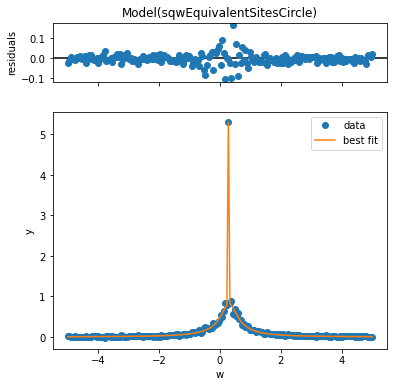

In [7]:
# display result
print('Result of fit:\n',result.fit_report())

# plot fitting result using lmfit functionality
result.plot()

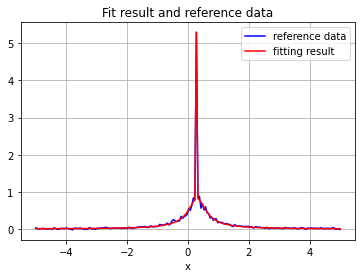

In [8]:
# plot fitting resulting using matplotlib.pyplot
fig1, ax1 = plt.subplots()
ax1.plot(xx, equiv_sites_circle_noisy, 'b-', label='reference data')
ax1.plot(xx, result.best_fit, 'r', label='fitting result')
ax1.legend()
ax1.set(xlabel='x', title='Fit result and reference data')
ax1.grid();

In [9]:
for item in ['resTime', 'radius', 'center', 'scale']:
    print(item, result.params[item].value, '+/-', result.params[item].stderr, dict_physical_units[item])

resTime 2.1048741873285195 +/- 0.04298187345867795 ps
radius 2.287685586210325 +/- 0.01094950258747381 Angstrom
center 0.2992998855751434 +/- 0.0051020751081531516 1/ps
scale 1.2579837118257506 +/- 0.014788477110696512 unit_of_signal/ps
